# Support Vector Machines: Strengths and Weaknesses

## 1. Learning Goals

By the end of this notebook, you will be able to:

- **Understand how Support Vector Machines work**  
  You'll learn how SVMs find a decision boundary that maximizes the margin between classes, and how this principle leads to robust classification.

- **Explore how SVMs behave in different scenarios**  
  We'll test SVMs on both linearly separable and non-linearly separable datasets using kernel tricks to handle more complex patterns.

- **Recognize the benefits of margin maximization**  
  You'll observe how maximizing the margin improves generalization and reduces the impact of outliers near the decision boundary.

- **Identify limitations and practical challenges of SVMs**  
  You'll reflect on when SVMs may be less effective — such as with large datasets or poorly chosen hyperparameters — and understand trade-offs in computation and kernel selection.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [3]:
def plot_decision_boundary(model, X, y, ax, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=ListedColormap(['#FFBBBB', '#BBBBFF']), alpha=0.4)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', alpha=0.8)
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

## 2. SVM on Linearly Separable Data

We'll start with a clean and linearly separable dataset.  

This is where SVMs excel—finding a decision boundary that not only separates the classes but does so with the largest possible margin.

We'll fit a linear SVM and visualize its predictions and decision boundary.


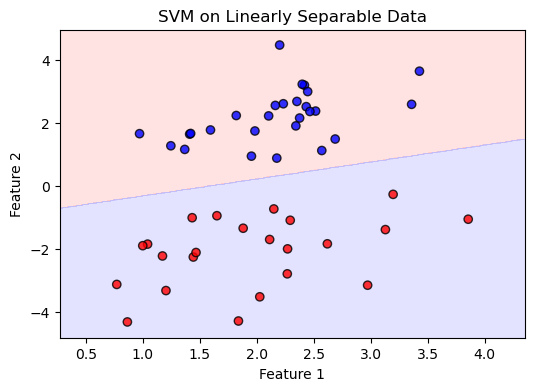

Test Accuracy: 1.0


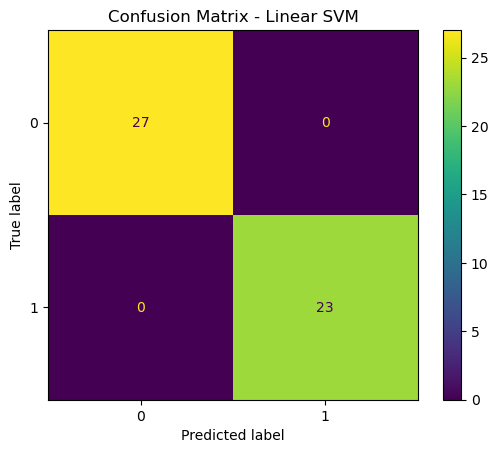

In [21]:
# Generate a linearly separable dataset
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, class_sep=2.0, random_state=1)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Train an SVM with a linear kernel
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)
y_pred = svc_linear.predict(X_test)

# Visualize the decision boundary using the helper function
fig, ax = plt.subplots(figsize=(6, 4))
plot_decision_boundary(svc_linear, X_test, y_pred, ax, "SVM on Linearly Separable Data")
plt.show()

# Print test accuracy and show confusion matrix
print("Test Accuracy:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(svc_linear, X_test, y_test)
plt.title("Confusion Matrix - Linear SVM")
plt.show()

✅ **Strength**: SVMs perform extremely well when the data is linearly separable. They maximize the margin between classes, offering robustness to minor variations in input.

## 3. SVM on Non-Linearly Separable Data (Using RBF Kernel)

When the data is not linearly separable, SVMs can still perform well by applying a kernel trick.  

The RBF (Radial Basis Function) kernel allows the model to project the data into a higher-dimensional space where a linear separator can be found.

Here, we'll apply an RBF kernel to a curved, moon-shaped dataset to see how the SVM adapts to complex boundaries.


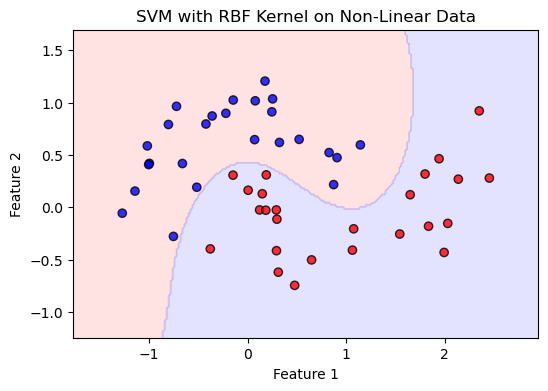

Test Accuracy: 0.98


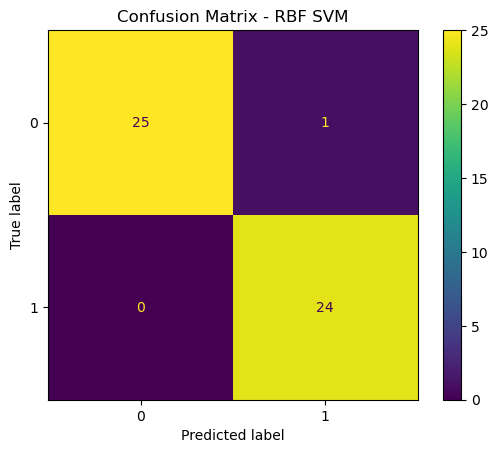

In [6]:
# Generate nonlinear data
X_nl, y_nl = make_moons(n_samples=200, noise=0.2, random_state=2)
X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(X_nl, y_nl, test_size=0.25, random_state=0)

# Train SVM with RBF kernel
svc_rbf = SVC(kernel='rbf', gamma='scale')
svc_rbf.fit(X_train_nl, y_train_nl)
y_pred_nl = svc_rbf.predict(X_test_nl)

# Plot decision boundary using plot_decision_boundary
fig, ax = plt.subplots(figsize=(6, 4))
plot_decision_boundary(svc_rbf, X_test_nl, y_pred_nl, ax, "SVM with RBF Kernel on Non-Linear Data")
plt.show()

# Print accuracy and confusion matrix
print("Test Accuracy:", accuracy_score(y_test_nl, y_pred_nl))

ConfusionMatrixDisplay.from_estimator(svc_rbf, X_test_nl, y_test_nl)
plt.title("Confusion Matrix - RBF SVM")
plt.show()

✅ **Strength**: By using kernels like RBF, SVMs can effectively classify complex, non-linear data. This makes them powerful tools for a wide range of classification problems.

## 4. SVM on Noisy and Ambiguous Data

While SVMs are powerful, they are also sensitive to outliers and noisy datasets.  

If the data is difficult to separate or includes mislabeled points near the margin, the model can be affected negatively.

In this section, we'll apply an SVM to a noisy classification task and observe the results.

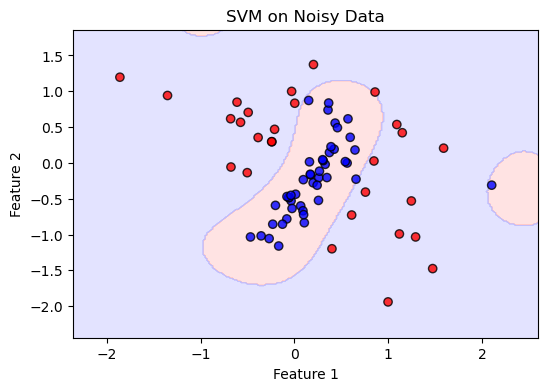

Test Accuracy: 0.76


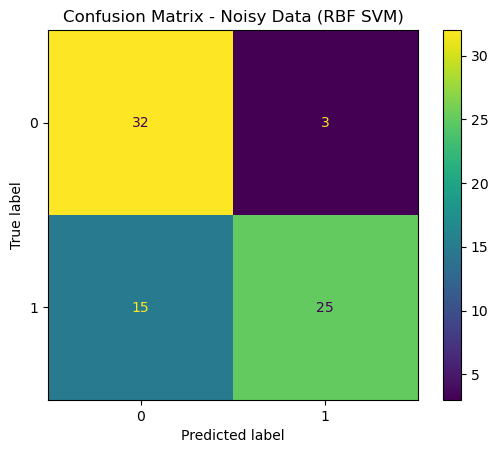

In [18]:
# Generate noisy dataset
X_noisy, y_noisy = make_classification(n_samples=300, n_features=2, n_redundant=0,
                                       n_informative=2, n_clusters_per_class=1,
                                       class_sep=0.2, flip_y=0.3, random_state=42)

# Split into training and test sets
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_noisy, y_noisy, test_size=0.25, random_state=42)

# Train SVM with RBF kernel
svc_noisy = SVC(kernel='rbf', C=1.0, gamma='scale')
svc_noisy.fit(X_train_n, y_train_n)

# Predict on test set
y_pred_n = svc_noisy.predict(X_test_n)

# Visualize classification boundary
fig, ax = plt.subplots(figsize=(6, 4))
plot_decision_boundary(svc_noisy, X_test_n, y_pred_n, ax, "SVM on Noisy Data")
plt.show()

# Print accuracy and show confusion matrix
print("Test Accuracy:", accuracy_score(y_test_n, y_pred_n))
ConfusionMatrixDisplay.from_estimator(svc_noisy, X_test_n, y_test_n)
plt.title("Confusion Matrix - Noisy Data (RBF SVM)")
plt.show()

⚠️ **Weakness**: When the data contains noise or ambiguous points near the margin, SVMs can struggle to find a reliable boundary. They may overfit to these noisy instances or produce overly complex decision surfaces depending on the kernel and parameters.

## 5. Summary and Reflection

You’ve explored how Support Vector Machines behave under a variety of conditions:

- SVMs shine when the data is clean and linearly separable.
- They adapt well to non-linear boundaries using kernels like RBF.
- They can, however, struggle with noisy data or poor parameter tuning.

SVMs offer a robust and versatile tool for classification but may require careful tuning and are less efficient for large-scale problems.

---

📝 **Reflection Question**:

Which of the following best describes a limitation of Support Vector Machines?

A. They work poorly on linearly separable data  
B. They cannot handle high-dimensional feature spaces  
C. They are sensitive to noise and computationally expensive on large datasets  
D. They never require tuning of hyperparameters

✅ Choose the best answer and explain your reasoning.
